The task of this demo is to determine the class of a star given its properties. There are 6 different classes of stars **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

The dataset is available here: https://www.kaggle.com/deepu1109/star-dataset

The dataset contains several features of stars:
1. Absolute temperature (Kelvins)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color (white,Red,Blue,Yellow,yellow-orange etc)
6. Spectral Class (O,B,A,F,G,K,,M)

The class labels are \\
0. Red Dwarf
1. Brown Dwarf
2. White Dwarf
3. Main Sequence
4. SuperGiants
5. Hypergiants


Based on the given features, we create a classification model using Feedforward Neural Networks and train the network on the data. 

We will perform the following tasks in this demo:
1. Exploratory Data analysis
2. Build a Feedforward Neural Network
3. Sensitivity Study
4. Hyperparameter tuning 
5. Prediction of class label for new observation. 

# Import Libraries

In [36]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf     # import the tensorflow library for building deep learning models
import pandas as pd
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.3.0


# Exploratory Data Analysis

In [37]:
#read the data
data = pd.read_csv("/content/drive/My Drive/6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [38]:
# display the data statistics
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Text(0.5, 1.0, 'Histogram for radius')

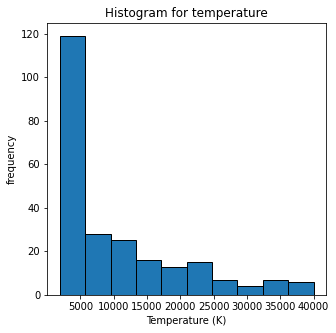

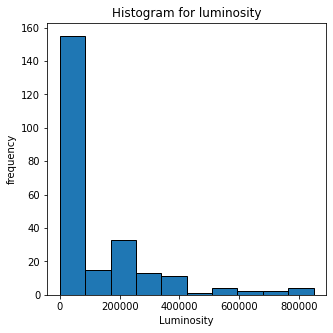

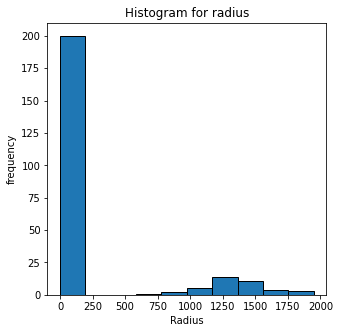

In [39]:
# print the histogram for temperature, luminosity and radius

plt.figure(figsize=(5,5))
plt.hist(data['Temperature (K)'],edgecolor='black')
plt.xlabel('Temperature (K)')
plt.ylabel('frequency')
plt.title('Histogram for temperature')


plt.figure(figsize=(5,5))
plt.hist(data['Luminosity(L/Lo)'],edgecolor='black')
plt.xlabel('Luminosity')
plt.ylabel('frequency')
plt.title('Histogram for luminosity')


plt.figure(figsize=(5,5))
plt.hist(data['Radius(R/Ro)'],edgecolor='black')
plt.xlabel('Radius')
plt.ylabel('frequency')
plt.title('Histogram for radius')

In [40]:
#remove the last two columns as they contribute nothing to the analysis
data = data.drop(["Star color","Spectral Class"],1)

In [41]:
# get the input data and labels
X = data.drop(["Star type"],axis=1) # drop the column "Star type" from the dataset
y = data["Star type"]   #assign the column "Star type" as the output label

In [42]:
# check if balanced classes
y.value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [43]:
# split the data into train and test sets 
from sklearn.model_selection import train_test_split  #import the train_test_split function
x_train ,x_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True,random_state=24)  

In [44]:
# print the number of training and test damples
print("Number of training samples: ",len(x_train))
print("Number of testing samples: ",len(x_test))

Number of training samples:  168
Number of testing samples:  72


In [45]:
# scale the inputs using the preprocessing module in sklear
from sklearn import preprocessing
x_f_train = preprocessing.scale(x_train)  #Standardize the training input
x_f_test = preprocessing.scale(x_test)    #Standardize the testing input
y_f_train = y_train
y_f_test = y_test

# Build the Feedforward Neural Network Architecture

The Feedforward Neural Network architecture includes:
1. Number of Hidden Layers
2. Number of units (neurons) in each layer
3. Weight initialization
4. Activation function for each layer
5. Number of output layers


To build a Feedforward Neural Network, we will use the TensorFlow library with the Keras backend. TensorFlow has built in function to build the model architecture. 

Listed below are the functions that will be used for building the model architecture: 

**Sequential()**: The Sequential() function creates a pipeline in which the layers will be stacked in series. 

**add()**: The add() function add a new layer to the pipeline. We specify the type of layer and its parameter inside the paranthesis ().

**Flatten()**: Flatten() convert the input row vector into a column vector. The example is covered in the next cell

**Dense()**: Dense() creates the fully-connected layers. It has the following arguments \\
1.   units: Number of units (neurons)
2.   kernel_intializer: Weight initialization using tf.keras.initializers. The common  options are zeros, fixed constant values or random values 
3.   activation:The activation function to use (Sigmoid, tanh, ReLU, Leaky ReLU)
4.   kernel_regularizer: The regularization to apply (L1 or L2) 


**Dropout()**:Add a dropout layer. The dropout layer implements the droput operation to the layer specified before it.  \\
  1. rate(): The dropout hyperparameter p that specifies the fraction of the input units to drop.

There are many other choices but we wont be covering them in this demo. 

In [46]:
# Example to understand Flatten()
X = tf.constant([1,2,3,4])
print("Before Flatten:", X)
X_f = tf.keras.layers.Flatten()(X)
print("After Flatten: ", X_f)

Before Flatten: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
After Flatten:  tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


In [47]:
# build the model
model = tf.keras.models.Sequential()  #create a sequential pipeline
model.add(tf.keras.layers.Flatten())  # add a Flatten layer 

# First hidden layer
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.relu))

# Output Layer. 
model.add(tf.keras.layers.Dense(units=6,kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.softmax))
'''
Since it is a multi-class classification problem the output layer activation function is the softmax activation 
function.

The dataset has 6 different classes. Hence the output layer contains 6 neurons. 
'''

'\nSince it is a multi-class classification problem the output layer activation function is the softmax activation \nfunction.\n\nThe dataset has 6 different classes. Hence the output layer contains 6 neurons. \n'

# Configure the Model 

**compile()**:compile() is used to configure the model for the training. That is set the optimization hyperparameters. The arguments are listed below: \\
  1. optimizer: The optimization function (SGD, RMSProp, ADAM ,etc.) 
  2. loss: The loss function (MSE, MAE, Cross-entropy) \\
  3. metrics: List of metrics to be evaluated by the model during training and testing (accuracy, loss, etc.).  

In [48]:
model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

'''
Since this is a classification task (multi-class) we use the categorical cross-entropy loss. TensorFlow has a 
sparse_categorical_crossentropy loss that does not require the true class labels to be one hot encoded. This helps
in reducing the storage requirements (integer vs one hot vector) 

We use accuracy as the metric for evaluation
'''

'\nSince this is a classification task (multi-class) we use the categorical cross-entropy loss. TensorFlow has a \nsparse_categorical_crossentropy loss that does not require the true class labels to be one hot encoded. This helps\nin reducing the storage requirements (integer vs one hot vector) \n\nWe use accuracy as the metric for evaluation\n'

# Train the model

**fit()**:The fit() function starts the training of the model. The arguments are:  \\
  1. x - The input data
  2. y - Output data
  3. batch_size - Batch size for mini-batch gradient descent
  4. epoch - specify the number of times to run the training loop.
  5. validation_data - the data to validate the model on (Since our dataset is very small we will use the test data as the validation data)

The results of the training are stored in a special instance called as history. We can extract performance measures from this instance. 

history.**history()**. The parameters are:
1. history['loss'] - training loss
2. history['val_los'] - validation loss
3. history['accuracy'] - training accuracy
4. history['val_acc'] - validation accuracy

In [49]:
history = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test))

Epoch 1/20
42/42 [==============================] - 0s 4ms/step - loss: 1.7052 - accuracy: 0.4107 - val_loss: 1.5257 - val_accuracy: 0.3750
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 1.2884 - accuracy: 0.5655 - val_loss: 1.1054 - val_accuracy: 0.5972
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.9299 - accuracy: 0.7143 - val_loss: 0.8084 - val_accuracy: 0.7222
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.7857 - val_loss: 0.5954 - val_accuracy: 0.7639
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8274 - val_loss: 0.5605 - val_accuracy: 0.6806
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8571 - val_loss: 0.5022 - val_accuracy: 0.7083
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8810 - val_loss: 0.3663 - val_accuracy: 0.8472
Epoch 8/20
42/42 [==

In [50]:
# use model.summary() to get a summary of the model architecture
model.summary()

'''
Layer - The type of layer used

Output Shape - The shape of the output of that layer. 
1. Here we have set the batch size to be equal to 4. Hence the output shape of Flatten() is (4,4)
2. For the hidden layer, we have set the number of neurons to be 64. Hence we have 64 output values as a vector. Hence
   the shape (4,64)
3. The output layer has 6 neurons. Hence the shape (4,6)

Param # - Specifies the number of trainable parameters in each layer. 
'''

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (4, 4)                    0         
_________________________________________________________________
dense_50 (Dense)             (4, 64)                   320       
_________________________________________________________________
dense_51 (Dense)             (4, 6)                    390       
Total params: 710
Trainable params: 710
Non-trainable params: 0
_________________________________________________________________


'\nLayer - The type of layer used\n\nOutput Shape - The shape of the output of that layer. \n1. Here we have set the batch size to be equal to 4. Hence the output shape of Flatten() is (4,4)\n2. For the hidden layer, we have set the number of neurons to be 64. Hence we have 64 output values as a vector. Hence\n   the shape (4,64)\n3. The output layer has 6 neurons. Hence the shape (4,6)\n\nParam # - Specifies the number of trainable parameters in each layer. \n'

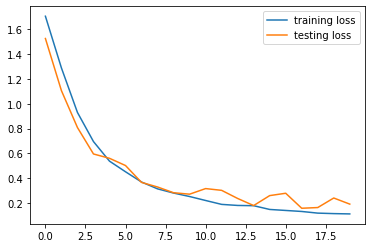

In [51]:
# plot the training loss and testing loss vs number of epochs
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()

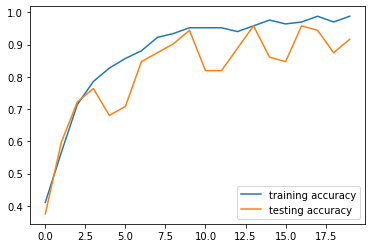

In [52]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='testing accuracy')
plt.legend()

# Sensitivity Study

We will perform Sensitivity study to observe the effect of the hyperparamters on the loss and accuracy of the model. We are only be covering 4 hyperparamters in this demo
1. Learning rate
2. Activation Function
3. Batch size
4. Number of Layers


***Learning rate***: A model with smaller learning rate will take longer time to converge, whereas a model with a large learning rate may not converge at all.

 We will carry out the training and validation of the model with the following learning rates. All the other hyperparameters are kept the same. 

**Learning rates**: \\
0.0001 \\
0.001 \\
0.01 \\
0.1  
1  
 

In [53]:
learning_rate = [0.0001,0.001,0.01,0.1,1] # define a list of all learning rates
history=[]    #create an emoty list to store the performance metrics for each learning rate
for lr in learning_rate:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=lr),    # set the learning rate
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  
  # verbose determines how many results of the training are shown real-time. If verbose=0 no results will be shown. 
  # The other two options are verbose = 1 or vebose = 2. 
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  # append the histogram instance to a list
  history.append(hist)

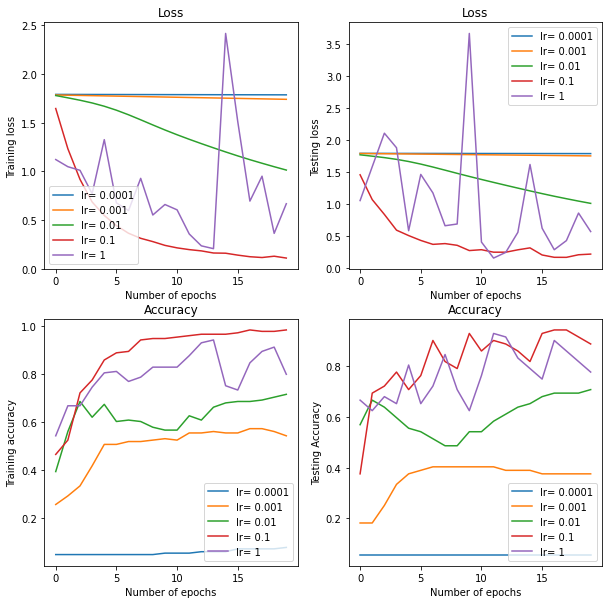

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='lr= 0.0001')
plt.plot(history[1].history['loss'],label='lr= 0.001')
plt.plot(history[2].history['loss'],label='lr= 0.01')
plt.plot(history[3].history['loss'],label='lr= 0.1')
plt.plot(history[4].history['loss'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.title ("Loss")
plt.legend()

plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='lr= 0.0001')
plt.plot(history[1].history['val_loss'],label='lr= 0.001')
plt.plot(history[2].history['val_loss'],label='lr= 0.01')
plt.plot(history[3].history['val_loss'],label='lr= 0.1')
plt.plot(history[4].history['val_loss'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Testing loss")
plt.title ("Loss")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='lr= 0.0001')
plt.plot(history[1].history['accuracy'],label='lr= 0.001')
plt.plot(history[2].history['accuracy'],label='lr= 0.01')
plt.plot(history[3].history['accuracy'],label='lr= 0.1')
plt.plot(history[4].history['accuracy'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Training accuracy")
plt.title ("Accuracy")
plt.legend()

plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='lr= 0.0001')
plt.plot(history[1].history['val_accuracy'],label='lr= 0.001')
plt.plot(history[2].history['val_accuracy'],label='lr= 0.01')
plt.plot(history[3].history['val_accuracy'],label='lr= 0.1')
plt.plot(history[4].history['val_accuracy'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Testing Accuracy")
plt.title ("Accuracy")
plt.legend()

We can clearly see that for a very low learning rate, the model does not converge in the given number of epochs. 

For higher learning rate (lr=1) we can see many oscillations in the loss before reaching the minima. 

The optimal learning rate (lr) is 0.1. We see a smooth and monotonically decreasing curve for this learning rate. 

***Activation function***: Different choice of activation functions are listed below:

1. sigmoid
2. tanh
3. ReLU
4. Leaky ReLU

In [55]:
activation_function = ['sigmoid','tanh','relu','leaky_relu']  #create a list of activation functions
history=[]
# the activation functions are inside the tf.nn function.
for act in activation_function:
  if act == 'sigmoid':
    activation = tf.nn.sigmoid  
  elif act == 'tanh':
    activation = tf.nn.tanh
  elif act == 'relu':
    activation = tf.nn.relu
  elif act == 'leaky_relu':
    activation = tf.nn.leaky_relu
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = activation))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)



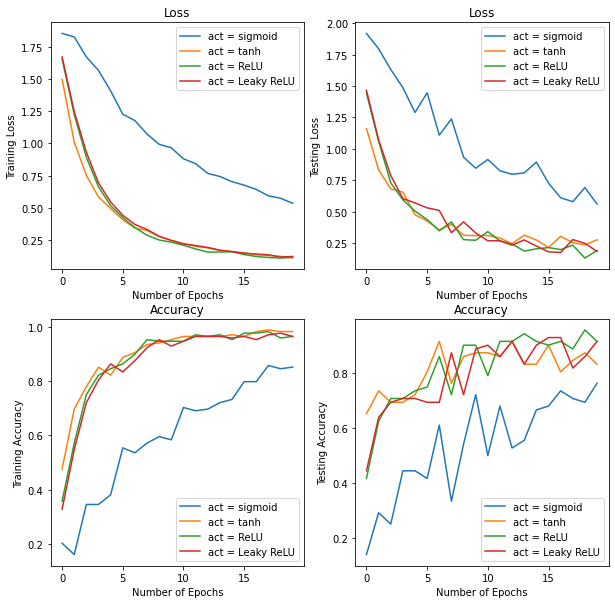

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='act = sigmoid')
plt.plot(history[1].history['loss'],label='act = tanh')
plt.plot(history[2].history['loss'],label='act = ReLU')
plt.plot(history[3].history['loss'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss")
plt.legend()

plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='act = sigmoid')
plt.plot(history[1].history['val_loss'],label='act = tanh')
plt.plot(history[2].history['val_loss'],label='act = ReLU')
plt.plot(history[3].history['val_loss'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Loss")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='act = sigmoid')
plt.plot(history[1].history['accuracy'],label='act = tanh')
plt.plot(history[2].history['accuracy'],label='act = ReLU')
plt.plot(history[3].history['accuracy'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='act = sigmoid')
plt.plot(history[1].history['val_accuracy'],label='act = tanh')
plt.plot(history[2].history['val_accuracy'],label='act = ReLU')
plt.plot(history[3].history['val_accuracy'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Accuracy")
plt.legend()

We see that except for sigmoid actvation function, the model gives good results for all the activation functions. 

***Batch size:*** We will compare the performance of standard, stochastic and mini-batch gradient descent. 
1. Standard gradient descent (Batch size = # of training samples)
2. Stochastic gradient descent (Batch size = 1)
3. Mini-Batch gradient descent (Batch size = 4)

In [57]:
batch_size = [len(x_train),1,4] # create a list of batch sizes
history=[]
for bs in batch_size:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=bs, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)



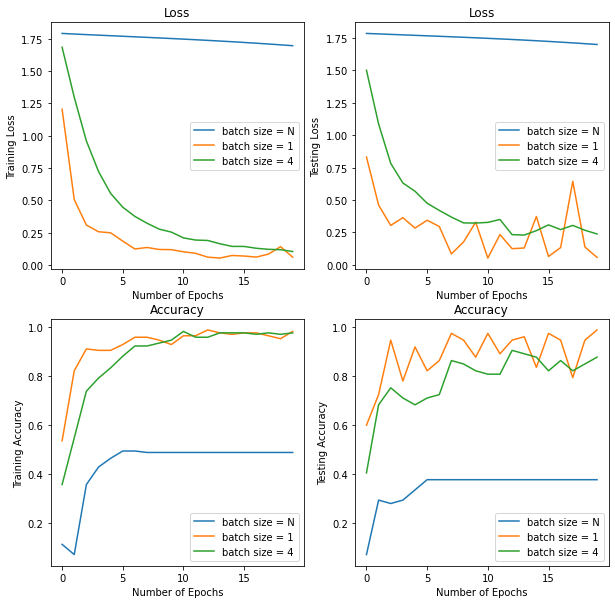

In [58]:
# add legend
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='batch size = N')
plt.plot(history[1].history['loss'],label='batch size = 1')
plt.plot(history[2].history['loss'],label='batch size = 4')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss")
plt.legend()


plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='batch size = N')
plt.plot(history[1].history['val_loss'],label='batch size = 1')
plt.plot(history[2].history['val_loss'],label='batch size = 4')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Loss")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='batch size = N')
plt.plot(history[1].history['accuracy'],label='batch size = 1')
plt.plot(history[2].history['accuracy'],label='batch size = 4')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Accuracy")
plt.legend()


plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='batch size = N')
plt.plot(history[1].history['val_accuracy'],label='batch size = 1')
plt.plot(history[2].history['val_accuracy'],label='batch size = 4')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Accuracy")
plt.legend()

We ca see that for standard gradient descent it takes a long time to converge whereas stochastic and mini-batch gradient converges quickly. 

The stochastic gradient converges the fastest but there are many oscillations in the loss whereas the mini-batch gives a smoother curve.

Let us see how many epochs does it take the standard gradient descent to converge!

In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))
model.compile(optimizer = tf.optimizers.SGD(learning_rate=.1),
     loss = 'sparse_categorical_crossentropy',
     metrics=['accuracy'])
# run the training for 1000 epochs
hist = model.fit(x_f_train,y_f_train,batch_size=len(x_train), epochs = 1000, validation_data=(x_f_test,y_f_test),verbose=1)
history.append(hist)

Epoch 1/1000
1/1 [==============================] - 0s 114ms/step - loss: 1.7833 - accuracy: 0.1905 - val_loss: 1.7794 - val_accuracy: 0.2778
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.7772 - accuracy: 0.3274 - val_loss: 1.7743 - val_accuracy: 0.3056
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.7712 - accuracy: 0.4286 - val_loss: 1.7692 - val_accuracy: 0.3889
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.7650 - accuracy: 0.5179 - val_loss: 1.7641 - val_accuracy: 0.4167
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7589 - accuracy: 0.5298 - val_loss: 1.7589 - val_accuracy: 0.4167
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.7528 - accuracy: 0.5357 - val_loss: 1.7536 - val_accuracy: 0.4167
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7466 - accuracy: 0.5357 - val_loss: 1.7483 - val_accuracy: 0.4167
Epoch 8/1000

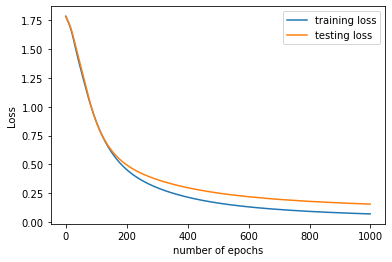

In [60]:
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='testing loss')
plt.xlabel("number of epochs")
plt.ylabel("Loss")
plt.legend()

***Number of hidden layers:*** As we increase the number of layers, the number of trainable parameters increase. 

For this demo, we have assumed all the hidden layers have the same configuration (number of units, activation function, weight initilization etc.). However in actual models, each layer has its own configuration.


Since this is a very small dataset we wont go higher than 3 hidden layers

In [61]:
hidden_layers = [1,2,3] # set the number of hidden layers
history=[]
for hl in hidden_layers:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range (hl):  # run a for loop to initialize hidden layers
    model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)



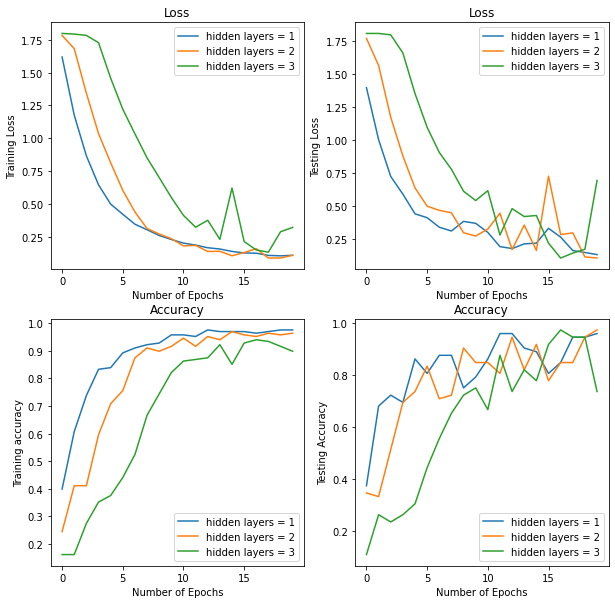

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='hidden layers = 1')
plt.plot(history[1].history['loss'],label='hidden layers = 2')
plt.plot(history[2].history['loss'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss")
plt.legend()


plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='hidden layers = 1')
plt.plot(history[1].history['val_loss'],label='hidden layers = 2')
plt.plot(history[2].history['val_loss'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Loss")
plt.legend()


plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='hidden layers = 1')
plt.plot(history[1].history['accuracy'],label='hidden layers = 2')
plt.plot(history[2].history['accuracy'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Training accuracy")
plt.title("Accuracy")
plt.legend()



plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='hidden layers = 1')
plt.plot(history[1].history['val_accuracy'],label='hidden layers = 2')
plt.plot(history[2].history['val_accuracy'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Accuracy")
plt.legend()

We can see that as we go on increasing the number of hidden layers, the loss increases. This is because the parameters haven't been fully trained yet. Running the training for longer epochs will help achieve better resluts but we might run into the problem of overfitting.

# Hyperparameter tuning using Grid Search

In order to find the best set of hyperparameters, we need to perform hyperparameter tuning or optimization. 

There are three main techniques of hyperparameter tuning:
1. Manual Search
2. Grid Search
3. Random Search

In this demo we will use the Grid Search method to look for the best set. We will define 4 grids of hyperparameters and loop through them and find out the grid that gives the highest validation accuracy.

In [63]:
# define a function that accepts the hyperparameters as a grid, creates a model and performs training and testing.
def classification_model(grid): #input argument is a list of hyperparameters
  # assign each element of the grid to the respective hyperparameters
  hidden_layers=grid[0]
  batch_size=grid[1]
  act=grid[2]
  learning_rate=grid[3]

  # select the activation function
  if act == 'sigmoid':
    activation = tf.nn.sigmoid
  elif act == 'tanh':
    activation = tf.nn.tanh
  elif act == 'relu':
    activation = tf.nn.relu
  elif act == 'leaky_relu':
    activation = tf.nn.leaky_relu

  history=[]

  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range (hidden_layers):   # set the specific number of hidden layers
    model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                  activation = activation)) #set the specific activation
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal(seed=0),activation = tf.nn.softmax))
  model.compile(optimizer = tf.optimizers.SGD(learning_rate=learning_rate),   # set the specific learning rate
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  model.fit(x_f_train,y_f_train,batch_size=batch_size, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)  #set the specific number of batch size
  
  # model.evaluate() function evaluates the trained model on the test data and return test loss and test accuracy
  test_loss, test_acc = model.evaluate(x_f_test, y_f_test,verbose=0)

  return test_acc

Define a set of grids. Each grid has 4 hyperparameters - 

grid = [number of hidden layers, batch size, activation function, learning rate] 

The range of the hyperparameters are as follows:
1. number of hidden layers = [1,3]
2. batch size = [4,64] (only powers of 2)
3. activation function = 'sigmoid','tanh','ReLU','Leaky ReLU'
4. learning rate = [0.001,0.01,0.1,1]

In [64]:
# define a set of grids
grid = [[2,4,'relu',0.1],[1,32,'sigmoid',0.1],[1,1,'sigmoid',0.001],[2,64,'relu',1]]
accuracies = []   #create an empty list to store test accuracy for each grid
for grid_val in grid: # loop through each grid
  out_acc = classification_model(grid_val)  # pass the grid as the argument to the function
  accuracies.append(out_acc)  #add the accuracy to the list
best_hp = grid[accuracies.index(max(accuracies))]   # find out the grid which gives the best performance.


In [65]:
# display the best grid of hyperparameters
best_hp

[2, 4, 'relu', 0.1]

# Final Model

Using the best set of hyperparameters obtained using Grid Search, we will create the final model. 

The best set of hyperparameters are:
1. number of hidden layers = 2 
2. batch size = 4
3. activation function = ReLU
4. learning rate = 0.1  

In [66]:
#build the final model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

#first hidden layer
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                activation = tf.nn.relu))

# second hidden layer
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                activation = tf.nn.relu))

# output layer
model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal(seed=0),activation = tf.nn.softmax))

# compile the model
model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1,),
     loss = 'sparse_categorical_crossentropy',
     metrics=['accuracy'])

# run the training loop 
model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)

# evaluate the trained model on the test dataset
test_loss,test_accuracy = model.evaluate(x_f_test,y_f_test)
print('Model accuracy=',test_accuracy)

3/3 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.8889
Model accuracy= 0.8888888955116272


In [67]:
# building the confusion matrix

# use the model.predict_classes function predict the class labels for the test data
y_pred = model.predict_classes(x_f_test)

# use the sklearn confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_f_test, y_pred))

[[10  0  0  0  0  0]
 [ 6  9  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 10  0  0]
 [ 0  0  0  1 16  0]
 [ 0  0  0  0  0 11]]


# Predict class label of New Observation

Now that our model is trained and optimized on the training and test dataset, we will now use the trained model to predict the class for a new observation. 

For the demo, we will be using one of the samples from the test data as a new sample

In [68]:
# get the new observation
x_new = x_f_test[25:26]

#predict the class for the new observation
y_pred = model.predict_classes(x_new)
print("The predicted class is: ",y_pred)

The predicted class is:  [3]
